In [1]:
'''
视频作者 视频分类信息分析
http://www.h4ck.org.cn
by obaby
obaby@mars
email:root@obaby.org.cn
date: 2020.09.04
'''

from pyspark.sql.functions import col
import altair as alt

import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
csv = spark.read.option("header",True).csv("hdfs://localhost:9000/data2/porn_data_movie.csv")

In [3]:
csv.printSchema()

root
 |-- id: string (nullable = true)
 |-- create: string (nullable = true)
 |-- update: string (nullable = true)
 |-- name: string (nullable = true)
 |-- describe: string (nullable = true)
 |-- source_id: string (nullable = true)
 |-- publish_time: string (nullable = true)
 |-- play_count: string (nullable = true)
 |-- good_count: string (nullable = true)
 |-- bad_count: string (nullable = true)
 |-- link_count: string (nullable = true)
 |-- comment_count: string (nullable = true)
 |-- designation: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- porn_site_id: string (nullable = true)
 |-- uploader_id: string (nullable = true)
 |-- producer: string (nullable = true)



In [4]:
csv.select('name', 'describe', 'uploader_id').show()

+------------------------+------------------------+-----------+
|                    name|                describe|uploader_id|
+------------------------+------------------------+-----------+
|    美女学生考试时被中出|                    null|          1|
|      无套中出内射（上）|            无套中出内射|          2|
|      无套中出内射（下）|            无套中出内射|          2|
|                极品嫩妹|                    null|          3|
|                骚妹妹 7|                    null|          3|
|漂亮美女完美身材甜美声音|漂亮美女完美身材甜美声音|          4|
|          jk捆绑萝莉束缚|                    null|          1|
|            最纯萝莉性爱|                    null|          1|
|          整容脸制服美女|                    null|          1|
|             星 调教萝莉|                    null|          5|
|        大一学生寝室自慰|                    null|          6|
|    超性感美女给你打飞机|                    null|          6|
|      超可爱萝莉下海资源|                    null|          6|
|      迷倒女儿然后慢慢操|                    null|          6|
|   精灵做爱高潮–影视剪辑|                    null|  

In [5]:
uploader_csv = spark.read.option("header",True).csv("hdfs://localhost:9000/data2/porn_data_uploader.csv")

In [6]:
uploader_csv.printSchema()

root
 |-- id: string (nullable = true)
 |-- uid: string (nullable = true)
 |-- create: string (nullable = true)
 |-- update: string (nullable = true)
 |-- name: string (nullable = true)
 |-- nickname: string (nullable = true)
 |-- describe: string (nullable = true)
 |-- porn_site_id: string (nullable = true)



In [7]:
uploader_csv.select('name', 'id', 'nickname', 'porn_site_id').show()

+--------------+---+--------------+------------+
|          name| id|      nickname|porn_site_id|
+--------------+---+--------------+------------+
|      双休姐姐|  1|      双休姐姐|           1|
|       huang86|  2|       huang86|        null|
|     豆腐乳123|  3|     豆腐乳123|           1|
|        小佑ya|  4|        小佑ya|           1|
|    蘿莉即正义|  5|    蘿莉即正义|           1|
|      绘画少女|  6|      绘画少女|           1|
|       7号玩家|  7|       7号玩家|           1|
|    苏大大大萌|  8|    苏大大大萌|           1|
|采菇凉滴小蘑菇|  9|采菇凉滴小蘑菇|           1|
|        谷之岚| 10|        谷之岚|           1|
|早乙女由依视频| 11|早乙女由依视频|        null|
|      至尊小宝| 12|      至尊小宝|           1|
|    辉哥搞事情| 13|    辉哥搞事情|           1|
|       王牌20i| 14|       王牌20i|           1|
|        草莓群| 15|        草莓群|        null|
|      萝莉不酱| 16|      萝莉不酱|           1|
|      奈何不了| 17|      奈何不了|           1|
|        meitub| 18|        meitub|        null|
|        邦哥88| 19|        邦哥88|           1|
|        调淫师| 20|        调淫师|           1|
+------------

In [8]:
movie_csv = csv.withColumnRenamed('name','movie_name')


In [9]:
movie_csv.show()

+---+--------------------+--------------------+------------------------+------------------------+---------+------------+----------+----------+---------+----------+-------------+-----------+-----------+------------+-----------+--------+
| id|              create|              update|              movie_name|                describe|source_id|publish_time|play_count|good_count|bad_count|link_count|comment_count|designation|category_id|porn_site_id|uploader_id|producer|
+---+--------------------+--------------------+------------------------+------------------------+---------+------------+----------+----------+---------+----------+-------------+-----------+-----------+------------+-----------+--------+
|  1|7/5/2020 05:20:14...|7/5/2020 05:20:14...|    美女学生考试时被中出|                    null|    76009|  1588819417|      2566|        14|        2|        48|            0|       null|          1|           1|          1|    null|
|  2|7/5/2020 05:21:04...|7/5/2020 05:21:04...|      无套中出内射（上）|   

In [10]:
uploader_rdd =movie_csv.select('movie_name','uploader_id').join(uploader_csv, movie_csv.uploader_id == uploader_csv.id, "inner")

In [11]:
uploader_rdd.select('movie_name','uploader_id','name','nickname', 'porn_site_id').show()

+------------------------+-----------+--------------+--------------+------------+
|              movie_name|uploader_id|          name|      nickname|porn_site_id|
+------------------------+-----------+--------------+--------------+------------+
|    美女学生考试时被中出|          1|      双休姐姐|      双休姐姐|           1|
|      无套中出内射（上）|          2|       huang86|       huang86|        null|
|      无套中出内射（下）|          2|       huang86|       huang86|        null|
|                极品嫩妹|          3|     豆腐乳123|     豆腐乳123|           1|
|                骚妹妹 7|          3|     豆腐乳123|     豆腐乳123|           1|
|漂亮美女完美身材甜美声音|          4|        小佑ya|        小佑ya|           1|
|          jk捆绑萝莉束缚|          1|      双休姐姐|      双休姐姐|           1|
|            最纯萝莉性爱|          1|      双休姐姐|      双休姐姐|           1|
|          整容脸制服美女|          1|      双休姐姐|      双休姐姐|           1|
|             星 调教萝莉|          5|    蘿莉即正义|    蘿莉即正义|           1|
|        大一学生寝室自慰|          6|      绘画少女|      绘画少女|           

In [12]:
uc = uploader_rdd.select('name')

In [13]:
upload_movie_count_rdd = uc.rdd.map(lambda x:(x,1)).reduceByKey(lambda x,y:x+y)

upload_movie_count_rdd.take(10)

[(Row(name='双休姐姐'), 228),
 (Row(name='huang86'), 2),
 (Row(name='蘿莉即正义'), 7),
 (Row(name='绘画少女'), 82),
 (Row(name='7号玩家'), 146),
 (Row(name='谷之岚'), 13),
 (Row(name='王牌20i'), 10),
 (Row(name='邦哥88'), 9),
 (Row(name='调淫师'), 18),
 (Row(name='萝莉原味'), 4)]

In [14]:
tp = upload_movie_count_rdd.sortBy(lambda a: a[1],ascending=False).toDF().toPandas()

In [15]:
tp.head()

,_1,_2
0,"(我想静静,)",836
1,"(正在直播,)",671
2,"(韩小柒,)",641
3,"(美女爱啪啪,)",626
4,"(走为上策,)",601


In [16]:
# 视频标签数量展示
alt.Chart(tp[:45]).mark_bar().encode(
    x=alt.X('_1', title='作者名称', sort='-y'),
    y=alt.Y('_2', title='视频数量')
)

alt.Chart(...)

In [17]:
from pyspark.sql.functions import col, desc, lit

uploader_rdd.filter(col('name') == '我想静静').select('movie_name', 'create').show()

+--------------+--------------------+
|    movie_name|              create|
+--------------+--------------------+
|      路边快餐|8/5/2020 03:07:22...|
|       KTV猛男|8/5/2020 03:07:22...|
|      口出水了|8/5/2020 03:07:22...|
|            牛|8/5/2020 03:07:22...|
|          剧情|8/5/2020 03:07:22...|
|开房偷拍好雁荡|8/5/2020 03:07:22...|
|             .|8/5/2020 03:07:22...|
|        太狠了|8/5/2020 03:07:22...|
|          侧拍|8/5/2020 03:07:22...|
|        难受😣|8/5/2020 03:07:22...|
|             .|8/5/2020 03:07:22...|
|  这么快就结局|8/5/2020 03:07:22...|
|      角度不好|8/5/2020 03:07:22...|
|    大姐姐会玩|8/5/2020 03:07:22...|
|             .|8/5/2020 03:07:22...|
|             .|8/5/2020 03:07:22...|
|             .|8/5/2020 03:07:22...|
|             .|8/5/2020 03:07:22...|
|    小姐姐一般|8/5/2020 03:07:22...|
|      自来水吗|8/5/2020 03:07:22...|
+--------------+--------------------+
only showing top 20 rows



In [18]:
no_uploader_count = csv.filter('uploader_id is null').count()
total_count = csv.count()
print('没有上传作者信息行数:', str(no_uploader_count))
print('总行数：', str(total_count))

没有上传作者信息行数: 84892
总行数： 155856


In [19]:
with_uploader_count = total_count - no_uploader_count
source = pd.DataFrame({
    'name':['无作者', '有作者', '总数'],
    'count':[no_uploader_count, with_uploader_count, total_count]
})
alt.Chart(source).mark_bar().encode(
    x='name',
    y='count'
)

alt.Chart(...)

In [20]:
from matplotlib.font_manager import FontManager
fm = FontManager()
mat_fonts = set(f.name for f in fm.ttflist)
print(mat_fonts)

{'Lohit Bengali', 'URW Gothic', 'Liberation Serif', 'Kalapi', 'Laksaman', 'Sahadeva', 'padmaa-Bold.1.1', 'Jamrul', 'URW Bookman', 'STIXNonUnicode', 'cmex10', 'Sawasdee', 'Kinnari', 'Garuda', 'KacstQurn', 'Rachana', 'Manjari', 'Abyssinica SIL', 'Nakula', 'KacstPen', 'KacstArt', 'Lohit Tamil', 'padmaa', 'Droid Sans Fallback', 'Yrsa', 'Norasi', 'Lohit Gurmukhi', 'KacstFarsi', 'FreeSans', 'STIXSizeOneSym', 'Lohit Gujarati', 'KacstTitleL', 'C059', 'Lohit Devanagari', 'Mitra Mono', 'Tlwg Typo', 'Keraleeyam', 'Liberation Sans', 'Ubuntu Mono', 'OpenSymbol', 'STIXGeneral', 'KacstLetter', 'STIXSizeFourSym', 'Ubuntu', 'DejaVu Serif', 'FreeMono', 'KacstTitle', 'Samyak Devanagari', 'Lohit Kannada', 'STIXSizeFiveSym', 'KacstOne', 'STIXSizeThreeSym', 'Nimbus Sans Narrow', 'mry_KacstQurn', 'Chilanka', 'Gargi', 'KacstDecorative', 'STIXSizeTwoSym', 'Lohit Telugu', 'Padauk', 'cmsy10', 'Uroob', 'Karumbi', 'ori1Uni', 'Dyuthi', 'Padauk Book', 'aakar', 'Nimbus Roman', 'RaghuMalayalamSans', 'Tlwg Mono', 'Gaya

In [21]:
from matplotlib.font_manager import FontProperties
def getChineseFont():  
    return FontProperties(fname='/System/Library/Fonts/PingFang.ttc',size=15)  

In [22]:
def create_pie_chart(font_name):
    font = {'family' : font_name,
    'weight' : 'bold',
    'size' : 10}
    plt.rc("font", **font)
    
    #plt.rcParams['font.sans-serif'] = ['Songti SC']
    
    labels = '无作者', '有作者'
    sizes = [no_uploader_count, with_uploader_count]
    explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.show()

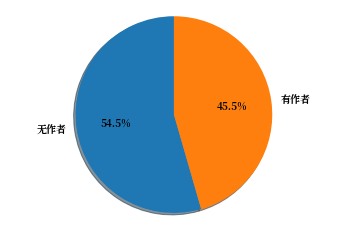

In [23]:
# 通过字体遍历，找个能用的字体
# for f in mat_fonts:
#     print(f)
#     create_pie_chart(f)
# Noto Serif CJK JP 可以显示中文字符~~
create_pie_chart('Noto Serif CJK JP')

In [24]:
# 分类信息读取 
category_csv = spark.read.option("header",True).csv("hdfs://localhost:9000/data2/porn_data_category.csv")

In [25]:
category_csv.printSchema()

root
 |-- id: string (nullable = true)
 |-- create: string (nullable = true)
 |-- update: string (nullable = true)
 |-- name: string (nullable = true)
 |-- key: string (nullable = true)
 |-- describe: string (nullable = true)



In [26]:
movie_cat_rdd = movie_csv.select('movie_name','category_id').join(category_csv, movie_csv.category_id == category_csv.id, "inner")



In [27]:
movie_cat_rdd.select('movie_name', 'name', 'id').show()

+------------------------+------+---+
|              movie_name|  name| id|
+------------------------+------+---+
|    美女学生考试时被中出|萝莉系|  1|
|      无套中出内射（上）|萝莉系|  1|
|      无套中出内射（下）|萝莉系|  1|
|                极品嫩妹|萝莉系|  1|
|                骚妹妹 7|萝莉系|  1|
|漂亮美女完美身材甜美声音|萝莉系|  1|
|          jk捆绑萝莉束缚|萝莉系|  1|
|            最纯萝莉性爱|萝莉系|  1|
|          整容脸制服美女|萝莉系|  1|
|             星 调教萝莉|萝莉系|  1|
|        大一学生寝室自慰|萝莉系|  1|
|    超性感美女给你打飞机|萝莉系|  1|
|      超可爱萝莉下海资源|萝莉系|  1|
|      迷倒女儿然后慢慢操|萝莉系|  1|
|   精灵做爱高潮–影视剪辑|萝莉系|  1|
|        小萝莉被插到大叫|萝莉系|  1|
|    睡醒和白嫩女友来一发|萝莉系|  1|
|  双马尾萝莉甜美自慰诱惑|萝莉系|  1|
|        调教双马尾小萝莉|萝莉系|  1|
|    黑丝小萝莉最喜欢玩具|萝莉系|  1|
+------------------------+------+---+
only showing top 20 rows



In [28]:
tr = movie_cat_rdd.select('name')

In [29]:
movie_cat_count_rdd = tr.rdd.map(lambda x:(x,1)).reduceByKey(lambda x,y:x+y)

movie_cat_count_rdd.take(10)

[(Row(name='萝莉系'), 1045),
 (Row(name='国产'), 2785),
 (Row(name='主播'), 1057),
 (Row(name='猫咪原创'), 723),
 (Row(name='A1制造'), 1),
 (Row(name='AI换脸'), 376),
 (Row(name='热剧成人版'), 63),
 (Row(name='韩三级'), 69),
 (Row(name='口罩'), 68),
 (Row(name='无码'), 1833)]

In [30]:
cp = movie_cat_count_rdd.sortBy(lambda a: a[1],ascending=False).toDF().toPandas()

In [31]:
cp.head()

,_1,_2
0,"(国产,)",2785
1,"(猫咪默认分类,)",2314
2,"(无码,)",1833
3,"(人气女优,)",1806
4,"(不雅视频,)",1546


In [32]:
# 视频标签数量展示
bars=alt.Chart(cp).mark_bar().encode(
    x=alt.X('_2', title='视频数量'),
    y=alt.Y('_1', title='分类名称', sort='-x')
)
text = bars.mark_text(align='left', baseline='middle', dx=3).encode(text='_2')
(bars + text).properties(height=1400, width=800)

alt.LayerChart(...)

In [33]:
bar2 =alt.Chart(cp).transform_joinaggregate(
    TotalTime='sum(_2)',
).transform_calculate(
    PercentOfTotal="datum._2 / datum.TotalTime",
    poft = "datum._2 / datum.TotalTime *100"
).mark_bar().encode(
    alt.X('PercentOfTotal:Q', axis=alt.Axis(format='.0%')),
    y=alt.Y('_1', title='分类名称', sort='-x')
)

text2 = bar2.mark_text(align='left', baseline='middle', dx=3).encode(text='poft:Q')
(bar2 + text2).properties(height=1400, width=800)

alt.LayerChart(...)

In [38]:
cp

,_1,_2
0,"(国产,)",2785
1,"(猫咪默认分类,)",2314
2,"(无码,)",1833
3,"(人气女优,)",1806
4,"(不雅视频,)",1546
...,...,...
105,"(四小时以上作品,)",6
106,"(家庭教师,)",6
107,"(多片合辑,)",4
108,"(A1制造,)",1


In [46]:
# tuple 拆分 https://stackoverflow.com/questions/29550414/how-to-split-column-of-tuples-in-pandas-dataframe
cp = cp.assign(**dict(zip('ab',cp._1.str)))

<ipython-input-46-696533104a4f>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  cp = cp.assign(**dict(zip('ab',cp._1.str)))


In [47]:
cp

,_1,_2,a
0,"(国产,)",2785,国产
1,"(猫咪默认分类,)",2314,猫咪默认分类
2,"(无码,)",1833,无码
3,"(人气女优,)",1806,人气女优
4,"(不雅视频,)",1546,不雅视频
...,...,...,...
105,"(四小时以上作品,)",6,四小时以上作品
106,"(家庭教师,)",6,家庭教师
107,"(多片合辑,)",4,多片合辑
108,"(A1制造,)",1,A1制造


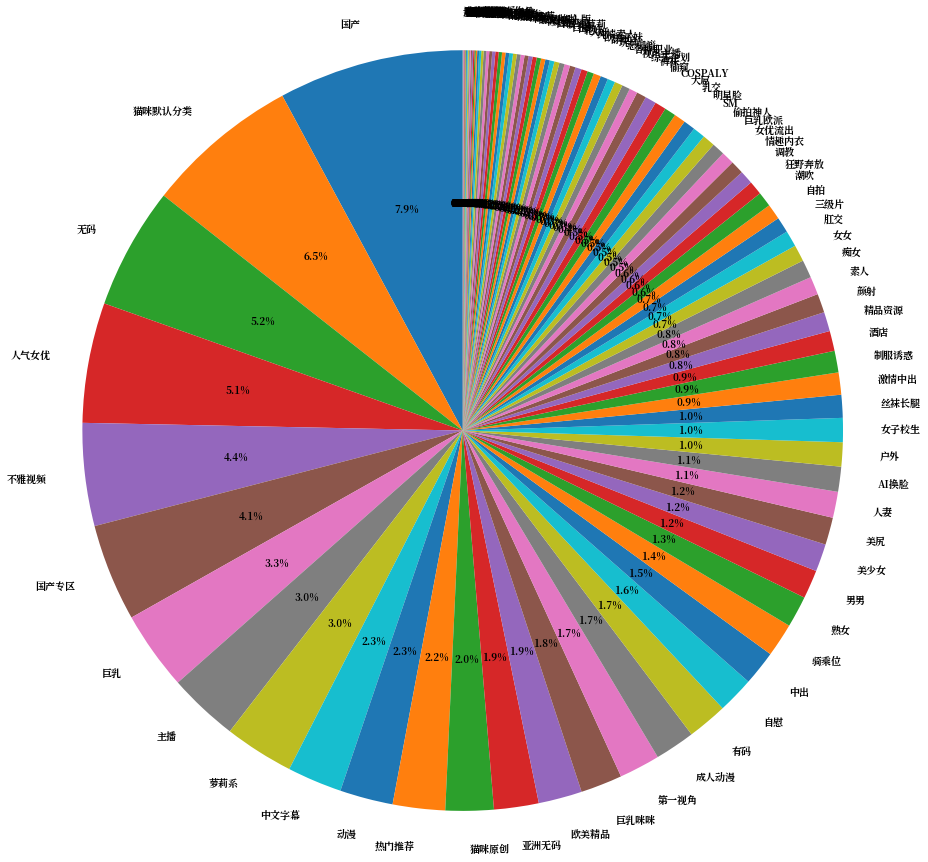

In [52]:

fig2, ax2 = plt.subplots(figsize=(15,15))
ax2.pie(cp._2,  labels=cp.a, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()